In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use(['science', 'no-latex'])

In [2]:
data_ng = {
    32: {
        'cg': np.loadtxt('experiments_2d/ldc/32/cg/n_cg_over_it.dat'),
        'dcdm': np.loadtxt('experiments_2d/ldc/32/dcdm/n_cg_over_it.dat'),
    },
    64: {
        'cg': np.loadtxt('experiments_2d/ldc/64/cg/n_cg_over_it.dat'),
        'dcdm': np.loadtxt('experiments_2d/ldc/64/dcdm/n_cg_over_it.dat'),
    },
    128: {
        'cg': np.loadtxt('experiments_2d/ldc/128/cg/n_cg_over_it.dat'),
        'dcdm': np.loadtxt('experiments_2d/ldc/128/dcdm/n_cg_over_it.dat'),
    },
}

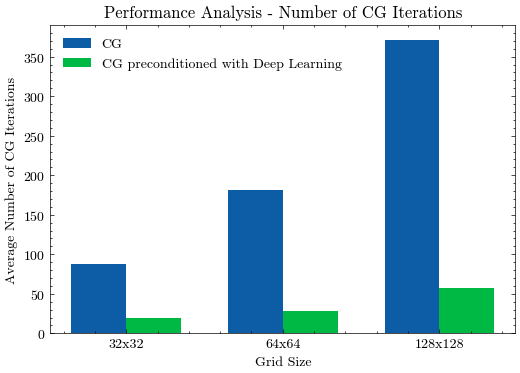

In [4]:
labels = ['32x32', '64x64', '128x128']
sizes = [32, 64, 128]
methods = ['cg', 'dcdm']
mean_iterations = {method: [np.mean(data_ng[size][method]) for size in sizes] for method in methods}

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(sizes))

bar_cg = ax.bar(index - bar_width/2, mean_iterations['cg'], bar_width, label='CG')
bar_dcdm = ax.bar(index + bar_width/2, mean_iterations['dcdm'], bar_width, label='CG preconditioned with Deep Learning')

ax.set_xlabel('Grid Size')
ax.set_ylabel('Average Number of CG Iterations')
ax.set_title('Performance Analysis - Number of CG Iterations')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('comparison_ng_deep_learning.pdf', format='pdf')

plt.show()